<a href="https://colab.research.google.com/github/MariamAbdi22/AI-Assignments/blob/main/AIPracticalExercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()
df= pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [ ]:
#Determine the number of rows and columns in the dataset
df.shape

(5268, 13)

In [ ]:
#Display the last 75 rows in the dataset
df.tail(75)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
df.isnull().sum() #returns the sum of missing values each column has

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


In [ ]:
#. Each column except the first one has some missing data. For each column, name
#the most appropriate method for treating the missing data. Justify your choices

#| **Column**   | **Likely Type**    | **Recommended Method**             | **Why**                                                                        |
#| ------------ | ------------------ | ---------------------------------- | ------------------------------------------------------------------------------ |
#| `Time`       | Time               | Fill with “Unknown” (best)         | That way, you preserve all records while keeping your data clean and interpretable. |
#| `Location`   | Categorical (text) | Fill with `"Unknown"`              | Avoid deleting records; keeps info consistent.                                 |
#| `Operator`   | Categorical        | Mode imputation                    | Operator is often repeated, so mode works well.                                |
#| `Type`       | Categorical        | Mode or fill `"Unknown"`           | Common aircraft type can be used as replacement.                               |
#| `Aboard`     | Numerical          | Median                             | Median is less sensitive to outliers.                                          |
#| `Fatalities` | Numerical          | Median                             | Keeps typical crash severity.                                                  |
#| `Ground`     | Numerical          | Fill with 0                        | If no info, assume no ground fatalities.                                       |
#| `Summary`    | Text               | Fill with `"No summary available"` | Maintains readability without biasing analysis.                                |




In [ ]:
#creating a new dataframe
fatality_locations=df[['Date', 'Location', 'Aboard', 'Fatalities']]



In [ ]:
#Determine the date of the highest number of recorded fatalities from this new dataframe.
df.query("Fatalities == Fatalities.max()")['Date']

,Date
2963,03/27/1977


<Axes: xlabel='Aboard', ylabel='Fatalities'>

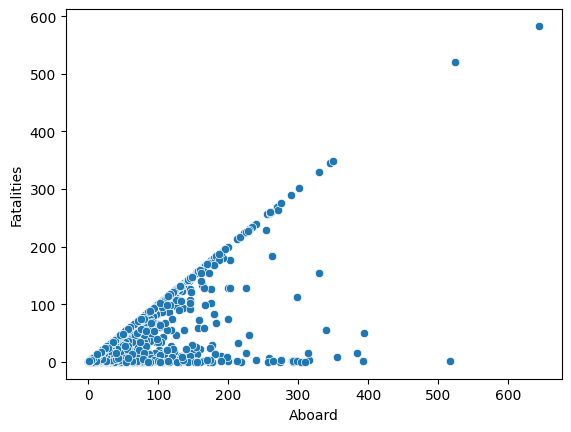

In [ ]:
#Compare the number of passengers aboard to the number of fatalities per crash. Are
#there any recorded crashes where there were no fatalities? If so, how many?
#Use scatterplot to visualize the relationship

import seaborn as sns
sns.scatterplot(x='Aboard', y='Fatalities', data=fatality_locations)



In [ ]:
df.query("Fatalities == 0").shape[0]

58

In [ ]:
#the location column has data items represented as ‘Region, U.S. State/Country’. Split this column to have two columns
#of regions and states/countries.

location_split = fatality_locations['Location'].str.split(',', n=1, expand=True)

fatality_locations.loc[:, 'Region'] = location_split[0]
fatality_locations.loc[:, 'Country'] = location_split[1].str.strip()

fatality_locations.head()


,Date,Location,Aboard,Fatalities,Region,State_Country,Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada","British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany,Germany


In [ ]:
#Order the dataframe by the number of fatalities from highest to lowest and select the
#first 100.

top_100_fatalities = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top_100_fatalities

,Date,Location,Aboard,Fatalities,Region,State_Country,Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan","near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland,110 miles West of Ireland
...,...,...,...,...,...,...,...
4852,04/15/2002,"Busan, South Korea",166.0,128.0,Busan,South Korea,South Korea
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi, Iran",128.0,128.0,Elburz Mtns.,"near Laskarak, Markazi, Iran","near Laskarak, Markazi, Iran"
1701,12/16/1960,"Staten Island / Brooklyn, New York",128.0,128.0,Staten Island / Brooklyn,New York,New York
5108,07/09/2006,"Irkutsk, Russia",203.0,128.0,Irkutsk,Russia,Russia


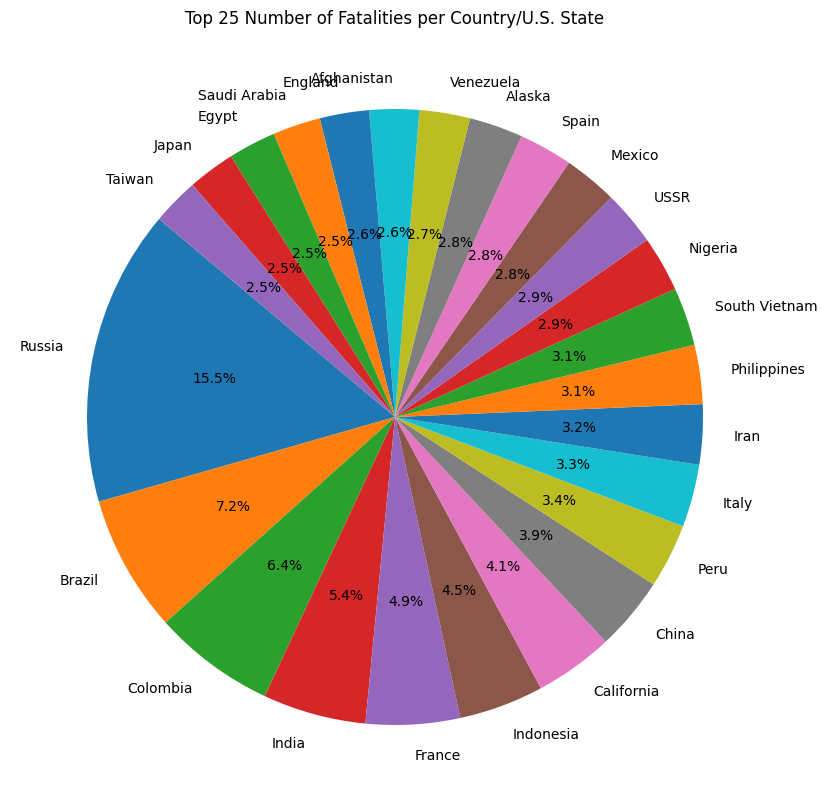

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Group the data by 'Country' and sum up fatalities for each
country_fatalities = fatality_locations.groupby('Country')['Fatalities'].sum()

# Step 2: Sort the countries by total fatalities in descending order
country_fatalities = country_fatalities.sort_values(ascending=False)

# Step 3: Select the top 25 countries/states with the highest fatalities
top_25 = country_fatalities.head(25)

# Step 4: Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_25, labels=top_25.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Number of Fatalities per Country/U.S. State')
plt.show()
